## Object Detection

## Setup

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pickle
from collections import Counter
import cv2

from tensorflow.keras.models import load_model

## Hyperparameter

In [2]:
label_name = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']) 

image_file_1 = "C:/Users/yukic/OneDrive/git/object_detection/images/airplane_02.jpg"
idx_target = 0

model_path_1 = "C:/Users/yukic/OneDrive/git/object_detection/models/model_2.h5"

input_size = 32
channel = 3

cutoff = 0.999

# filename_1 = 'idx_matrix_x32_airplane_02_model_2.sav'
# filename_2 = 'prob_matrix_x32_airplane_02_model_2.sav'

# imagename_1 = "max_prob_matrix_airplane_02_model2"
# imagename_2 = "target_prob_matrix_airplane_02_model2"
# imagename_3 = "multi_box_airplane_02_model2"
# imagename_4 = "single_box_airplane_02_model2"

# title_1 = "Max probs matrix (Model 2)"
# title_2 = "Target probs matrix (Model 2)"
# title_3 = "Bounding boxes extraction (Model 2)"
# title_4 = "Model 2"

## Load images

Size: (4096, 2726)
Channel: RGB
Height multiplied by width: 11,165,696


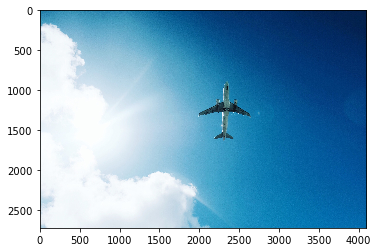

In [6]:
img_1 = Image.open(image_file_1)
print("Size:", img_1.size)
print("Channel:", img_1.mode)
print("Height multiplied by width: {:,}".format(img_1.size[0] * img_1.size[1]))

plt.imshow(img_1)
plt.show()

## Load trained model

In [7]:
loaded_model = load_model(model_path_1)
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_v1_14 (B (None, 32, 32, 32)        128       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)       

## Preprocess

In [ ]:
img_1_arr = np.array(img_1)
shape_1 = img_1_arr.shape
print("Before preprocess", shape_1)

# change shape to allow neural network to input the data
img_1_proc = img_1_arr.reshape((-1, shape_1[0], shape_1[1], shape_1[2]))
print("After preprocess", img_1_proc.shape)

img_1_proc = img_1_proc.astype("float32")
img_1_proc /= 255